# Event Viewer
Basic 3d visualization tool to view events in a given h5 file. <br>
Plots detector geometry -- then given an event index, plots the hits in the event, the event vertex, and the final hit

In [13]:
import pandas as pd
import numpy as np
import h5py
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [14]:
# h5_filepath = "/home/mattStubbs/watchmal/NeutronGNN/data/h5_files/iwcd_mpmt_shorttank_neutrongnn_2files.h5"
# train_indices_file = "/home/mattStubbs/watchmal/NeutronGNN/data/splits/train_indicies_2files.txt"
# val_indices_file = "/home/mattStubbs/watchmal/NeutronGNN/data/splits/validation_indicies_2files.txt"
# test_indices_file = "/home/mattStubbs/watchmal/NeutronGNN/data/splits/test_indicies_2files.txt"
h5_filepath = "/home/mattStubbs/watchmal/NeutronGNN/data/h5_files/iwcd_mpmt_shorttank_neutrongnn_trainval_dn.h5"
train_indices_file = "/home/mattStubbs/watchmal/NeutronGNN/data/splits/train_indicies_dn_ALL.txt"
val_indices_file = "/home/mattStubbs/watchmal/NeutronGNN/data/splits/validation_indicies_dn_ALL.txt"
test_indices_file = "/home/mattStubbs/watchmal/NeutronGNN/data/splits/test_indicies_dn_ALL.txt"

In [15]:
with h5py.File(h5_filepath, 'r') as file:
    print(list(file.keys()))
    h5_event_data = file['event_data']
    h5_nhits = file['nhits']
    h5_labels = file['labels']
    labels = np.array(h5_labels)
    
    event_data = np.memmap(h5_filepath, mode='c', shape=h5_event_data.shape,
                               offset=h5_event_data.id.get_offset(),
                               dtype=h5_event_data.dtype)
    print("{} events; up to {} hits per event; {} features per hit per event.".format(event_data.shape[0],
                                                                    event_data.shape[1], event_data.shape[2]))
    nhits = np.array(h5_nhits)
    positions0 = file['positions']
    positions0 = np.array(positions0)   #initial positions of simulated particles
    angles = file['angles']             #initial angles of simulated particles
    angles = np.array(angles)

['angles', 'energies', 'event_data', 'event_ids', 'labels', 'nhits', 'positions', 'root_files']
1574748 events; up to 300 hits per event; 8 features per hit per event.


In [16]:
npPositions0 = [positions0[i].flatten() for i in range(len(positions0))]

__time sorting__ <br>
Sort hits within an event chronologically in time. <br>This way, we get a sense of the progression of hits throughout the event, instead of the hits appearing randomly scattering throughout the tank

In [17]:
# find indices for a few events with minimum hit numbers
minHitsList = (np.where(nhits==min(nhits)))
print(minHitsList)
print(minHitsList[0][-4:])

(array([    360,     833,     994, ..., 1574392, 1574550, 1574636]),)
[1574317 1574392 1574550 1574636]


In [14]:
# Time variable for a couple events before time sorting
for i in minHitsList[0][:2]:
    print(event_data[i][:, 1][:nhits[i]])

# note: unit of time is nanoseconds

[926.3 925.3 928.2 925.7 953.  929.4]
[948.4 950.2 951.  948.6 950.  949.8]


# time sorting

In [18]:
def sortTimeAsc(x):
    temp = event_data[x][np.argsort(event_data[x][:nhits[x], 1])]
    event_data[x] = np.append(temp, np.zeros((300-nhits[x], 8)), axis = 0)

In [19]:
for i in range(event_data.shape[0]):
    sortTimeAsc(i)

In [13]:
# # Time variable for these couple events after time sorting
# for i in minHitsList[0][:2]:
#     print(event_data[i][:, 1][:nhits[i]])

# event display

In [28]:
def display_event(i):
    """
    Plots detector geometry, event hits, event vertex and final event hit
    ----------
    i: Event index
    """
    labelDict = {0:"neutron",1:"electron"}
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(xs=npPositions0[i][0], ys = npPositions0[i][1], 
               zs = npPositions0[i][2], s=350, color='m', label='event vertex')
    ax.scatter(xs=event_data[i, 0, 2], ys=event_data[i, 0, 3], zs=event_data[i, 0, 4],
               s = 350, color = 'red', label="first hit")
    ax.scatter(xs=event_data[i, nhits[i]-1, 2], ys=event_data[i, nhits[i]-1, 3], zs=event_data[i, nhits[i]-1, 4],
               s = 350, color = 'peru', label="final hit")
    
    ax.scatter(
    xs=event_data[:, :, 2],
    ys=event_data[:, :, 3],
    zs=event_data[:, :, 4],
    alpha = 0.005,
    )
    
    x0, y0, z0 = [npPositions0[i][0], event_data[i,0,2]], [npPositions0[i][1], event_data[i,0,3]], [npPositions0[i][2], event_data[i,0,4]]
            
    ax.plot(x0, y0, z0, linewidth=7, color='r')
    
    ax.plot(
        xs=event_data[i, :, 2][:nhits[i]],
        ys=event_data[i, :, 3][:nhits[i]],
        zs=event_data[i, :, 4][:nhits[i]],
        alpha = 1.0, color='orange', linewidth=3.5
    )
    #ax.set_title('Hit Locations of 16,000 events')
    ax.set_title('Short Tank')
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    plt.title("{} event {}".format(labelDict[labels[i]], i))
    plt.legend()

    plt.show()

plot a few events using the viewer

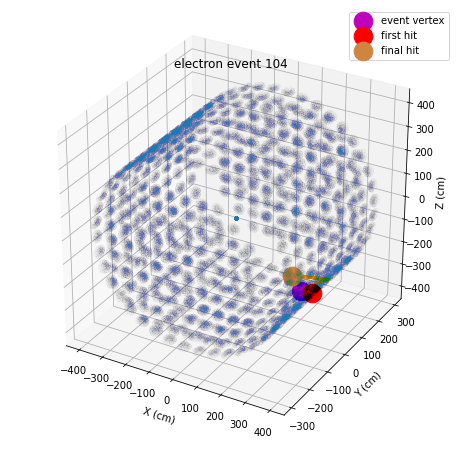

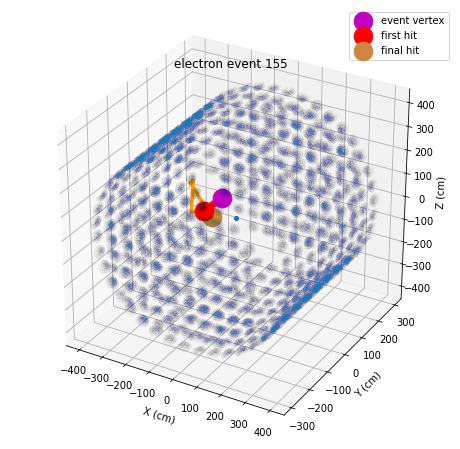

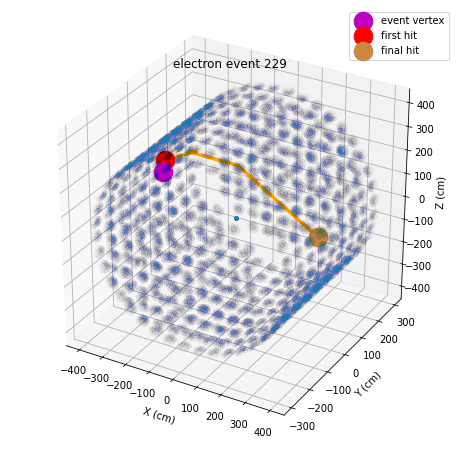

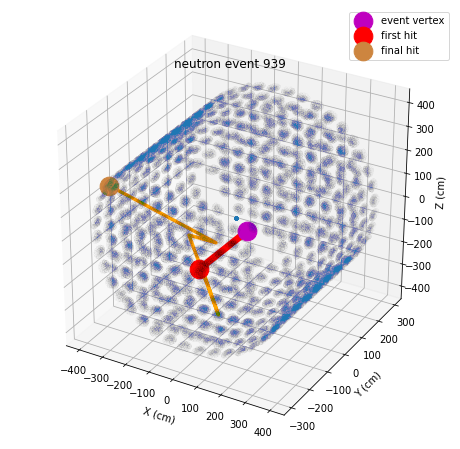

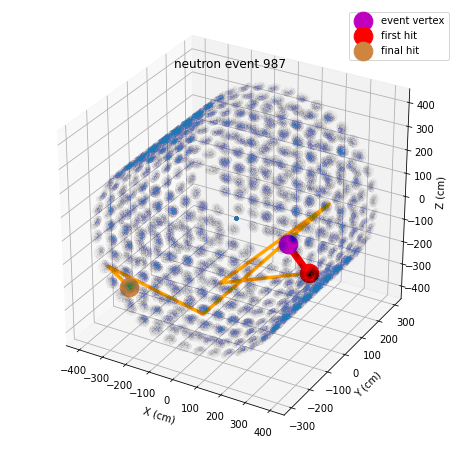

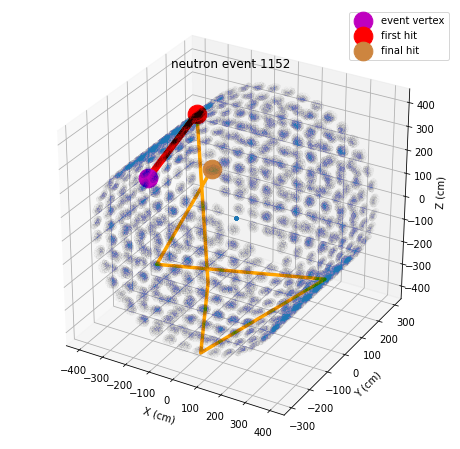

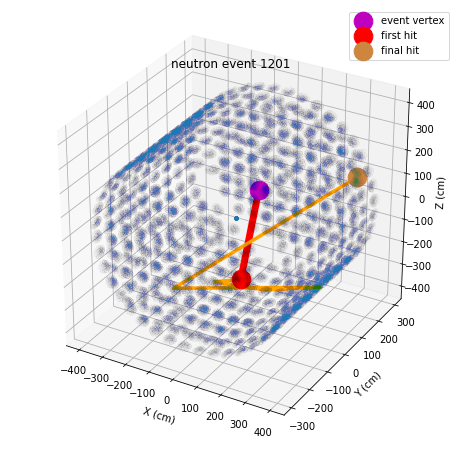

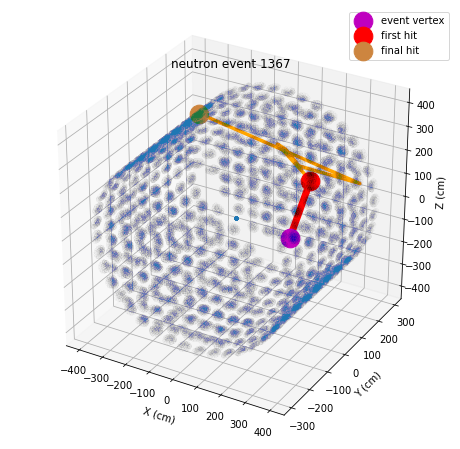

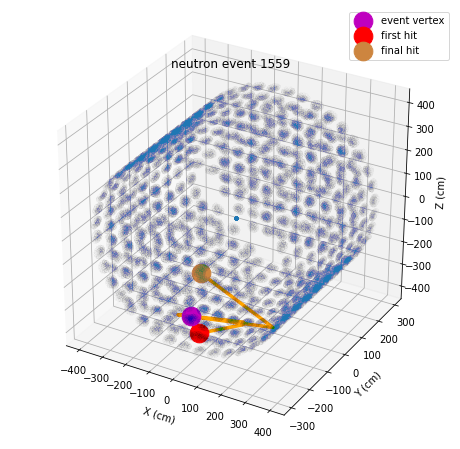

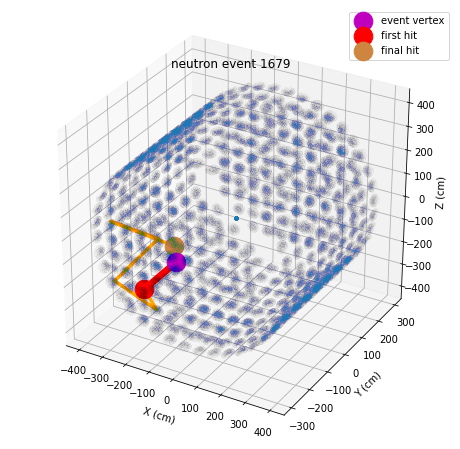

In [29]:
# neutron events
for i in np.squeeze(minHitsList[0][:5]):
    display_event(i) 
    
#electron events
for i in np.squeeze(minHitsList[0][-5:]):
    display_event(i)

In [20]:
# dark noise
def display_event(i):
    """
    Plots detector geometry, event hits, event vertex and final event hit
    ----------
    i: Event index
    """
    labelDict = {0:"neutron",1:"dark noise"}
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(xs=npPositions0[i][0], ys = npPositions0[i][1], 
               zs = npPositions0[i][2], s=350, color='m', label='event vertex')
    ax.scatter(xs=event_data[i, 0, 2], ys=event_data[i, 0, 3], zs=event_data[i, 0, 4],
               s = 350, color = 'red', label="first hit")
    ax.scatter(xs=event_data[i, nhits[i]-1, 2], ys=event_data[i, nhits[i]-1, 3], zs=event_data[i, nhits[i]-1, 4],
               s = 350, color = 'peru', label="final hit")
    
#     ax.scatter(
#     xs=event_data[:, :, 2],
#     ys=event_data[:, :, 3],
#     zs=event_data[:, :, 4],
#     alpha = 0.001,
#     )
    
    x0, y0, z0 = [npPositions0[i][0], event_data[i,0,2]], [npPositions0[i][1], event_data[i,0,3]], [npPositions0[i][2], event_data[i,0,4]]
            
    ax.plot(x0, y0, z0, linewidth=7, color='r')
    
    ax.plot(
        xs=event_data[i, :, 2][:nhits[i]],
        ys=event_data[i, :, 3][:nhits[i]],
        zs=event_data[i, :, 4][:nhits[i]],
        alpha = 1.0, color='orange', linewidth=3.5
    )
    #ax.set_title('Hit Locations of 16,000 events')
    ax.set_title('Short Tank')
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    plt.title("{} event {}".format(labelDict[labels[i]], i))
    plt.legend()

    plt.show()

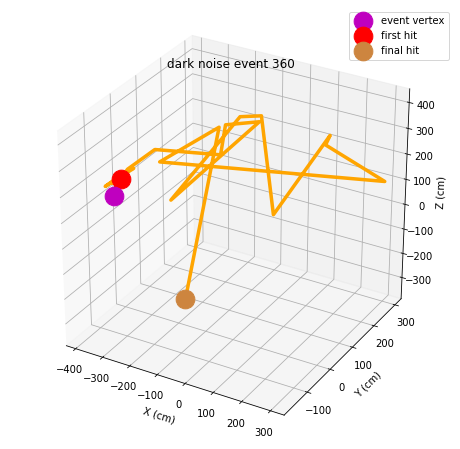

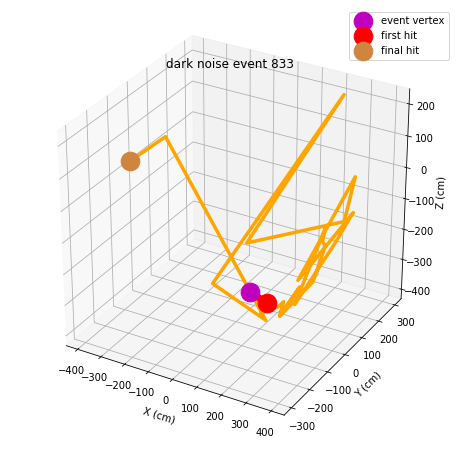

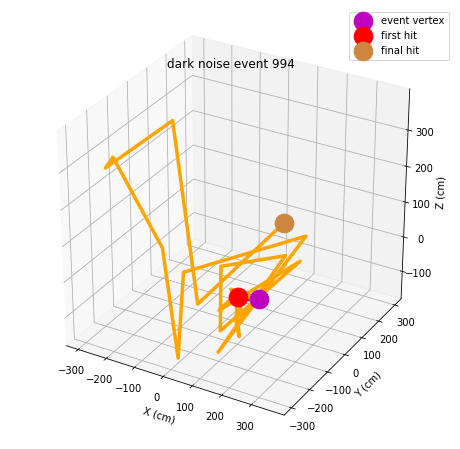

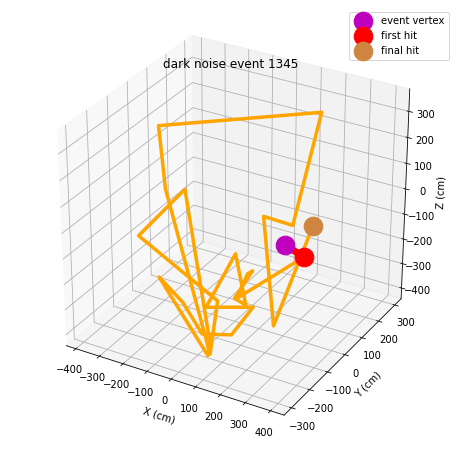

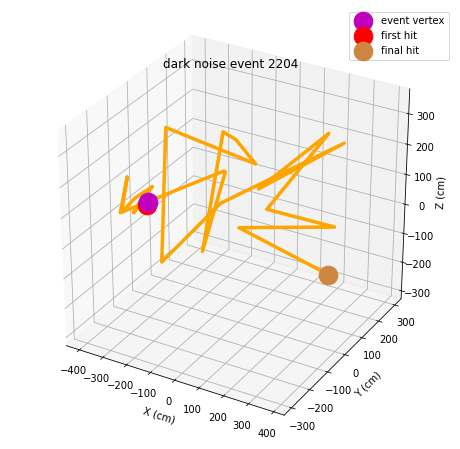

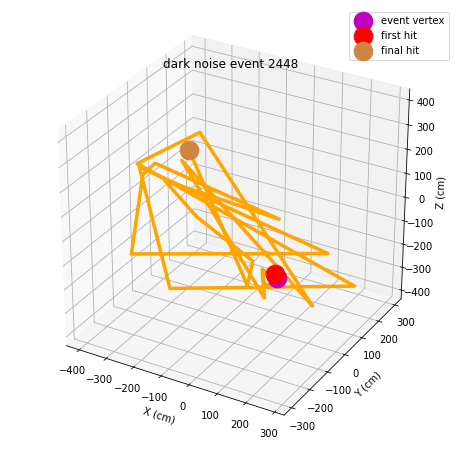

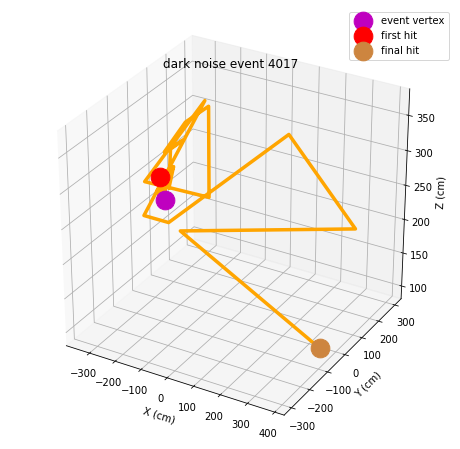

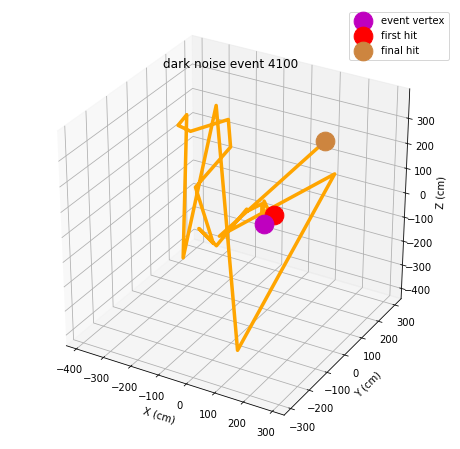

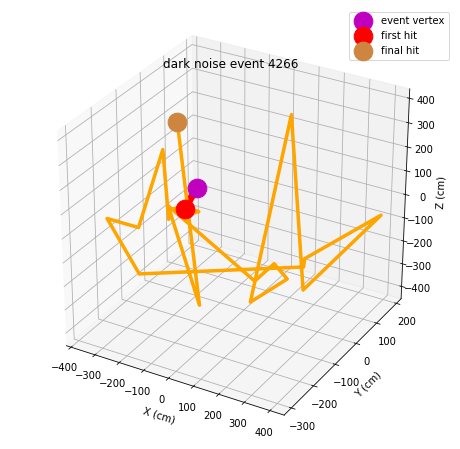

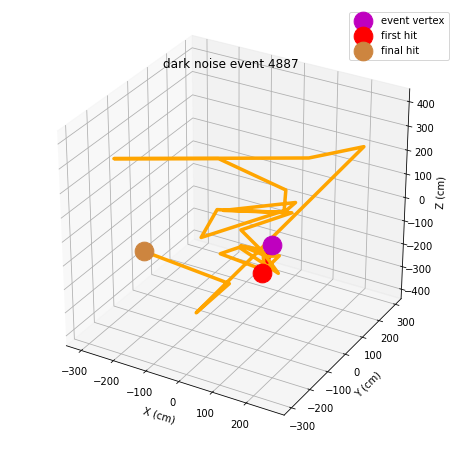

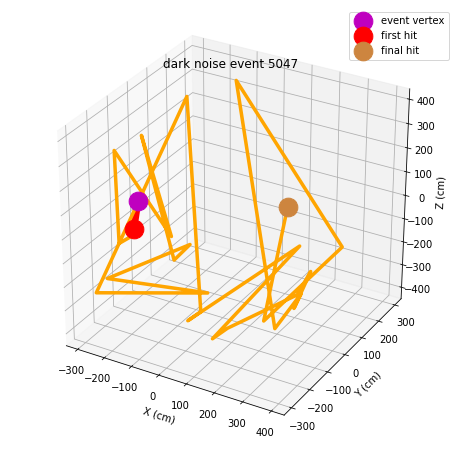

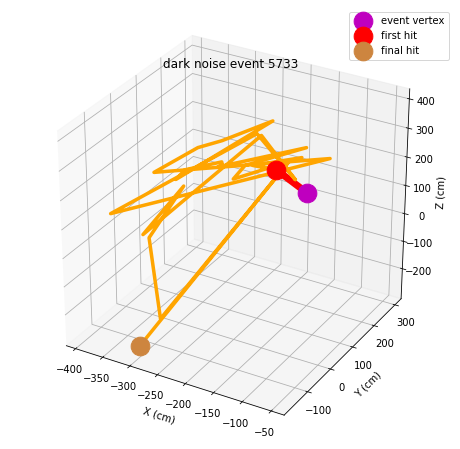

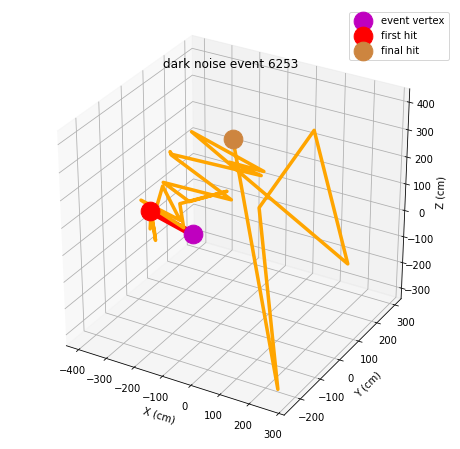

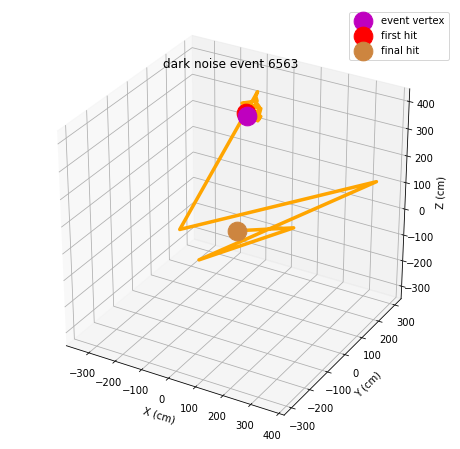

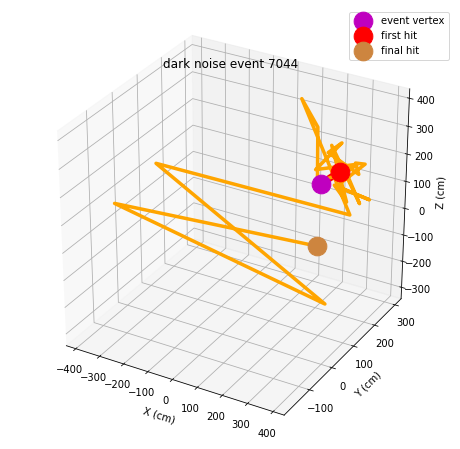

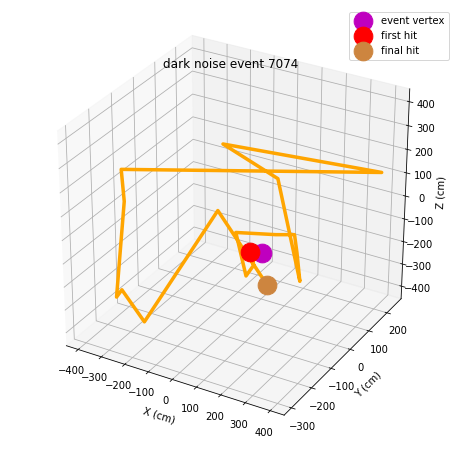

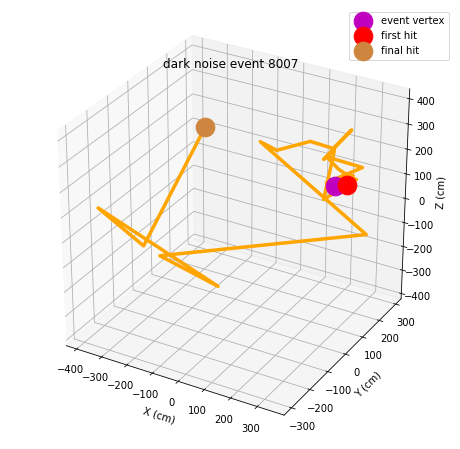

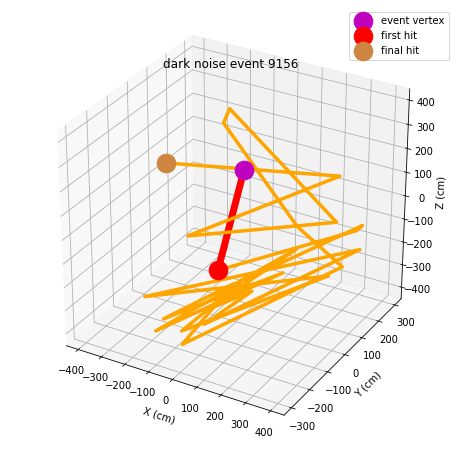

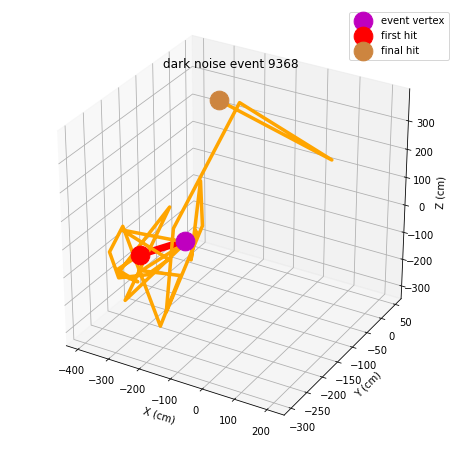

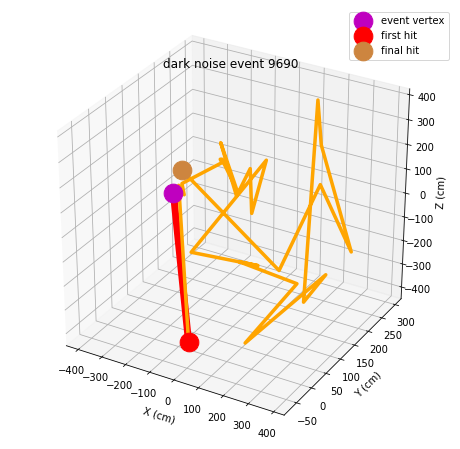

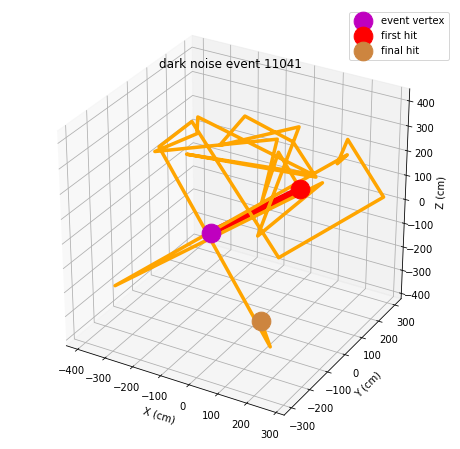

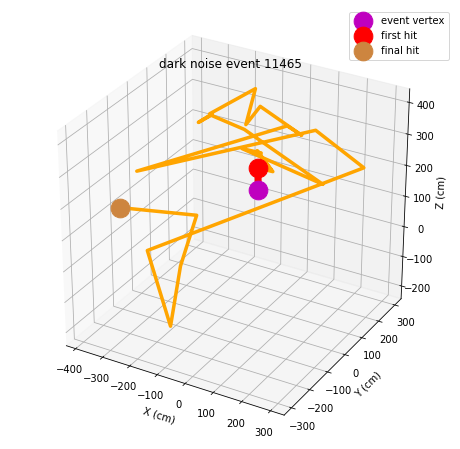

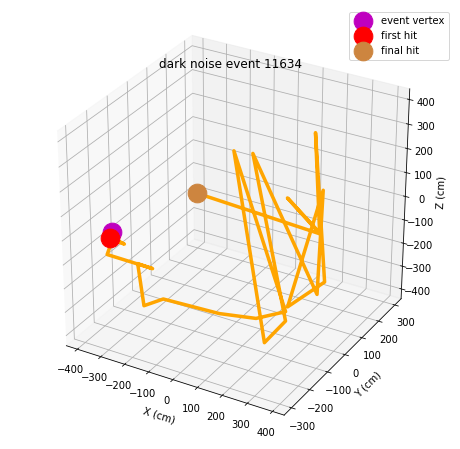

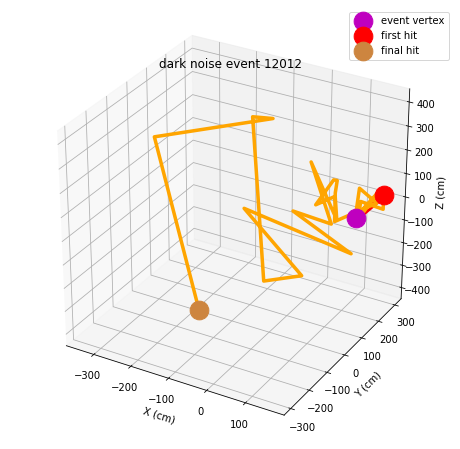

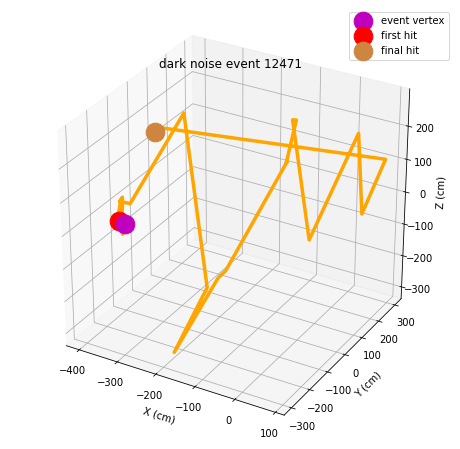

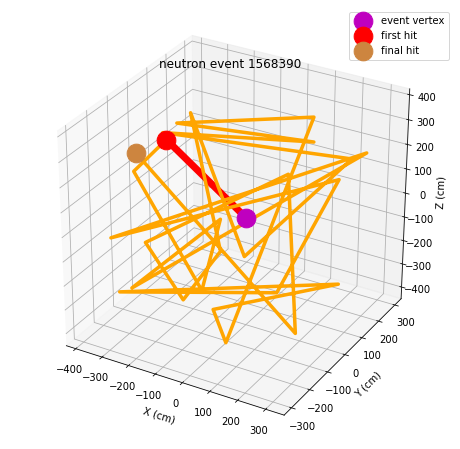

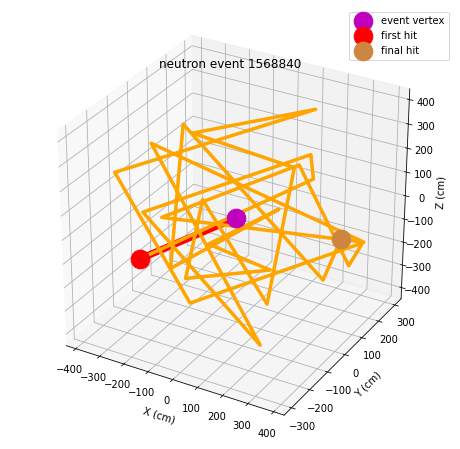

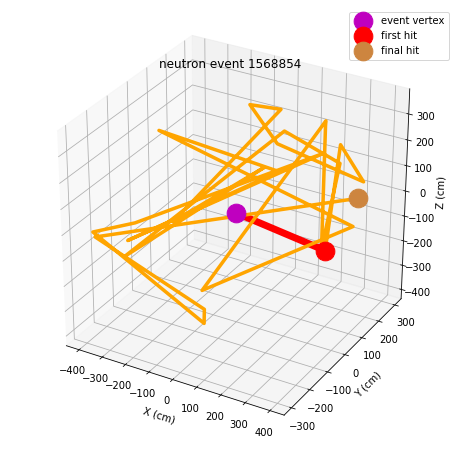

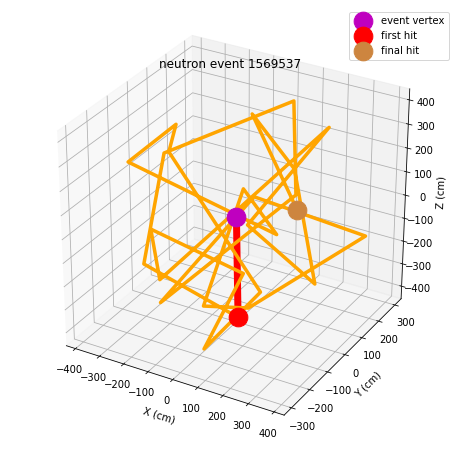

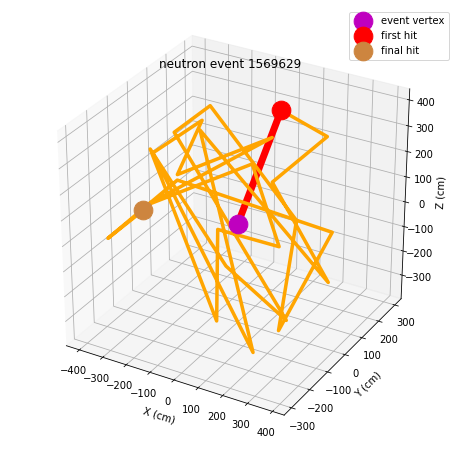

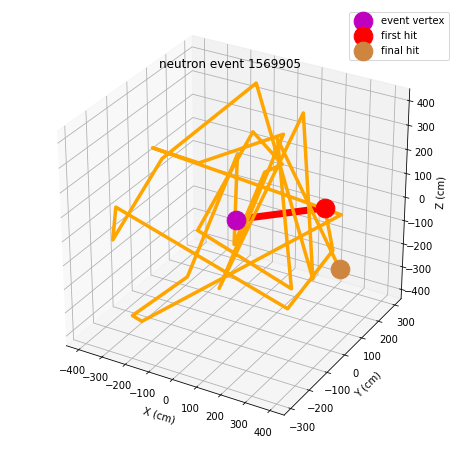

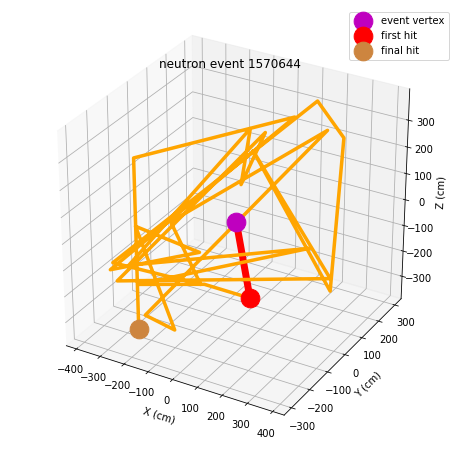

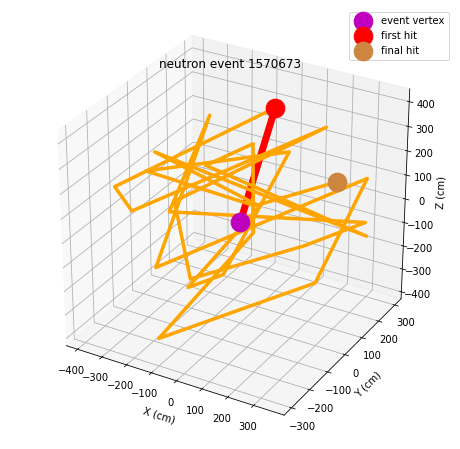

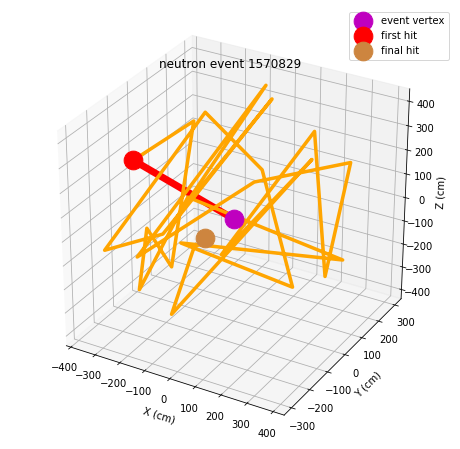

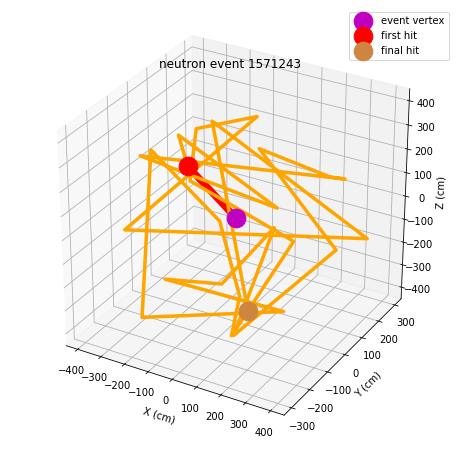

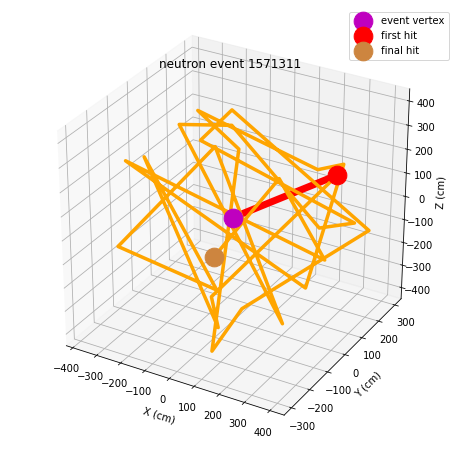

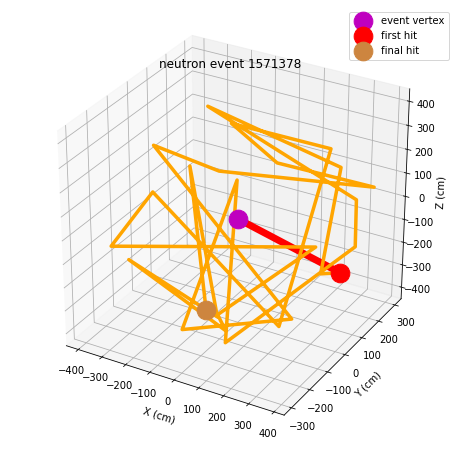

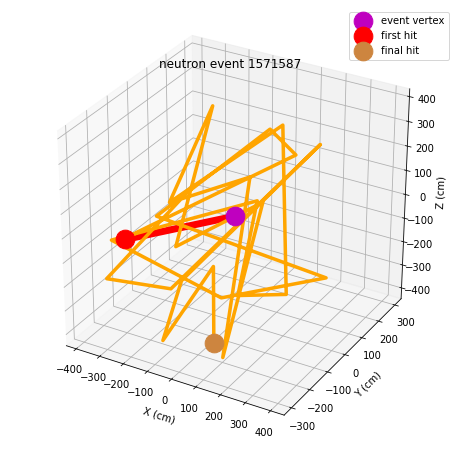

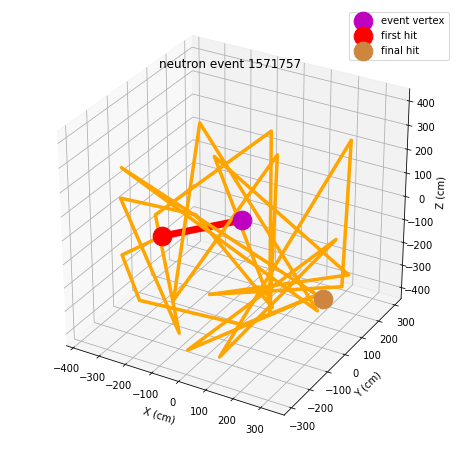

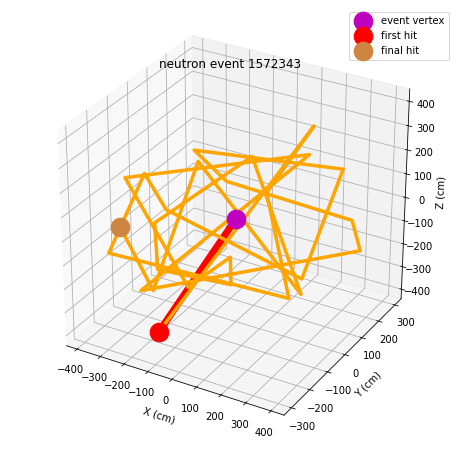

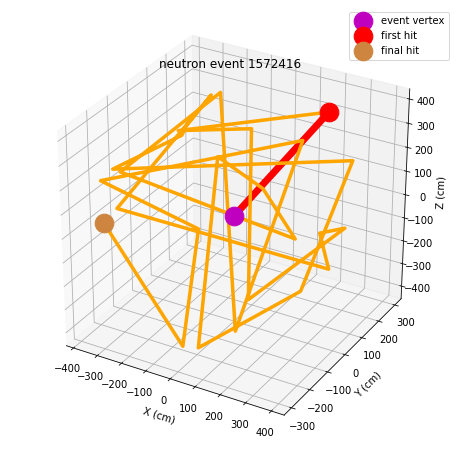

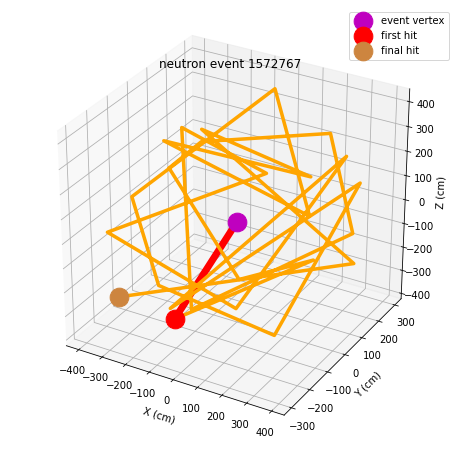

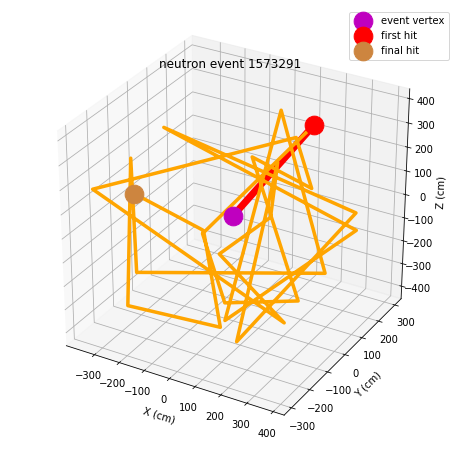

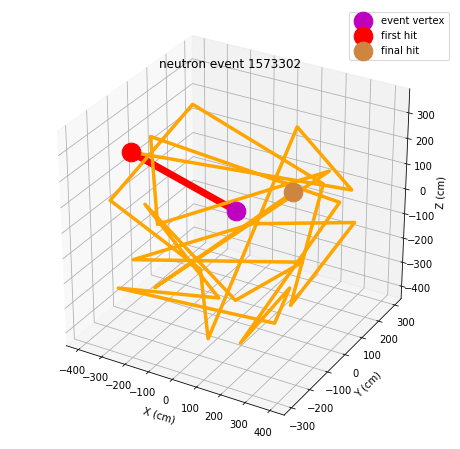

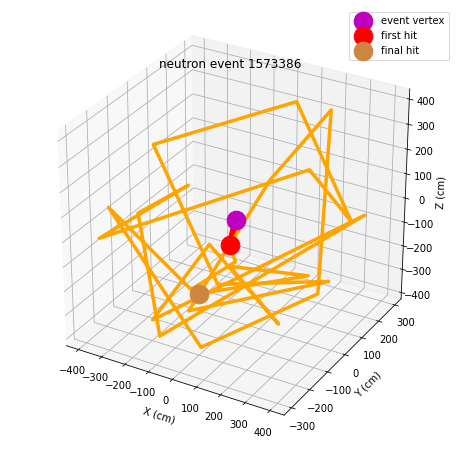

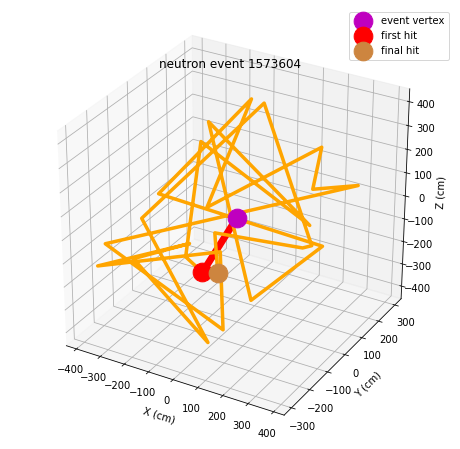

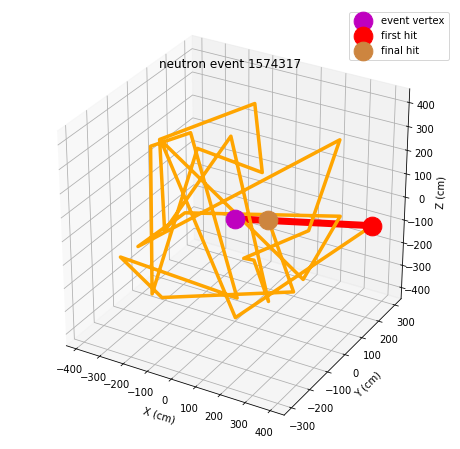

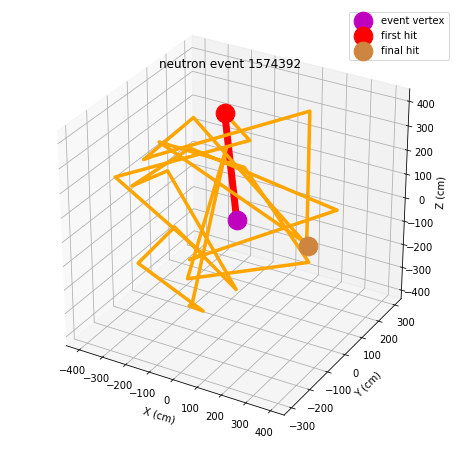

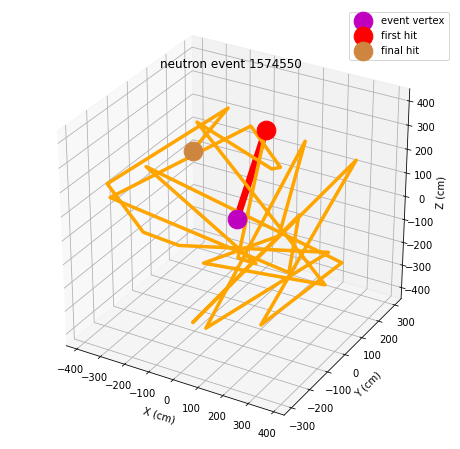

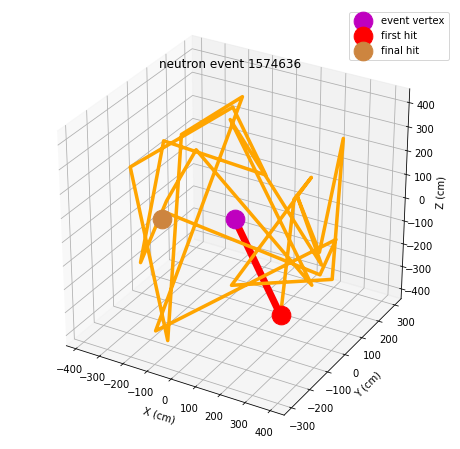

In [21]:
# neutron events
for i in np.squeeze(minHitsList[0][:25]):
    display_event(i) 
    
#electron events
for i in np.squeeze(minHitsList[0][-25:]):
    display_event(i)